

The most simple linear regression without regularization

In [256]:
from helper import *
from stats import *
from imp import reload   
import helper
import stats
import  sklearn.preprocessing
reload(helper)
reload(stats)


<module 'stats' from 'C:\\Users\\dell\\stats.py'>

In [257]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM 

16

- number of cores, set this number according to your computer

- sample period

In [258]:
period = 4096
product_list = ["IF", "IH", "IC", "T", "TF"]

- get all of the days

In [259]:
import dask
from dask import compute, delayed

In [260]:
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days
## 1092

1092

In [261]:
SAVE_PATH = "e:/intern"
train_sample = all_dates<"2018"
test_sample = all_dates>"2018"
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

In [262]:
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "volume.open.ratio", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+".4096" for signal in all_signal_list]

In [263]:
np.append(signal_list, ["ret.4096", "ret.4096.001", "ret.4096.002"])

array(['trade.imb.4096', 'total.trade.imb.4096', 'nr.4096', 'dbook.4096',
       'range.pos.4096', 'price.osci.4096', 'ma.dif.10.4096',
       'kdj.k.4096', 'kdj.j.4096', 'trade.imb.range.4096',
       'total.trade.imb.range.4096', 'nr.range.4096', 'dbook.range.4096',
       'range.pos.range.4096', 'price.osci.range.4096',
       'ma.dif.10.range.4096', 'kdj.k.range.4096', 'kdj.j.range.4096',
       'trade.imb.std.4096', 'total.trade.imb.std.4096', 'nr.std.4096',
       'dbook.std.4096', 'range.pos.std.4096', 'price.osci.std.4096',
       'ma.dif.10.std.4096', 'kdj.k.std.4096', 'kdj.j.std.4096',
       'trade.imb.volume.open.ratio.4096',
       'total.trade.imb.volume.open.ratio.4096',
       'nr.volume.open.ratio.4096', 'dbook.volume.open.ratio.4096',
       'range.pos.volume.open.ratio.4096',
       'price.osci.volume.open.ratio.4096',
       'ma.dif.10.volume.open.ratio.4096', 'kdj.k.volume.open.ratio.4096',
       'kdj.j.volume.open.ratio.4096', 'trade.imb.trend.index.4096',
      

In [264]:
data = load(DATA_PATH+product_list[0]+"/"+all_dates[9])

- let's begin with week 7 

- to build up a regression model, we need predictors and response variables
- the previous signals can be predictors
- now we need to create a response

- for example, we can use future log returns as response

- here fcum means the future sum of data
- for example

In [265]:
sample_y = fcum(data["ret"], period)

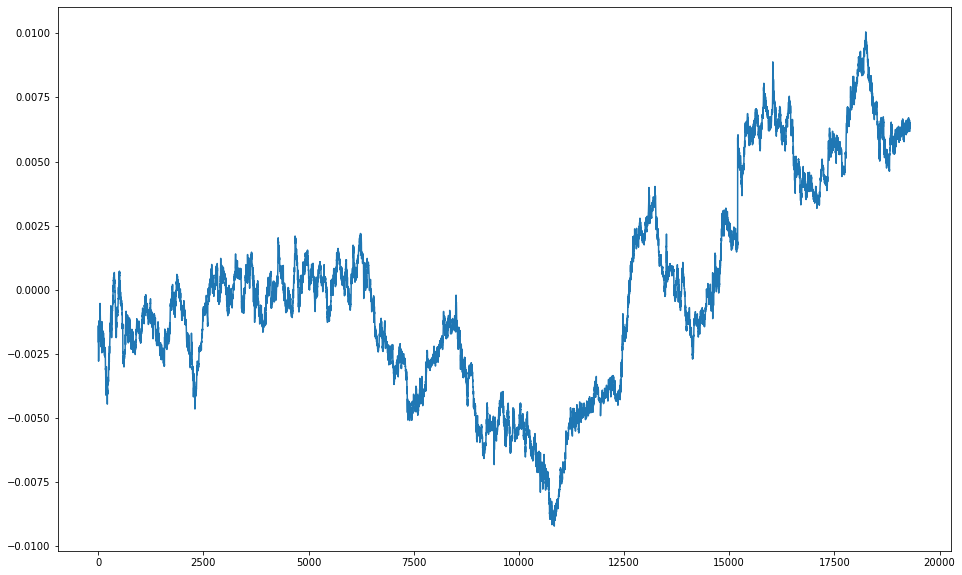

In [266]:
plt.figure(1, figsize=(16, 10))
plt.plot(sample_y[data["good"]].values);

In [267]:
kurtosis(sample_y[data["good"]], fisher=False)
## 2.4794545454512655

2.4794545454512655

- the response has quite high kurtosis, it means the response has fat tails


- we can check the result

In [268]:
np.sum(data["ret"][3000:(3000+period)])
## 0.002470774245956856

0.002470774245956856

In [269]:
sample_y[2999]
## 0.0024707742459568627

0.0024707742459568627

- so fcum means future sume, and ys is the future price return

- now we create directory for this response signal

In [270]:
## calculate future return
class foctor_ret_period(factor_template):
    factor_name = "ret.period"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return fcum(data["ret"],period).values
    
y = foctor_ret_period()



In [271]:
for product in product_list:
    create_signal_path(y, product,SAVE_PATH);

e:/intern/tmp pkl/IF/ret.1024
e:/intern/tmp pkl/IF/ret.2048
e:/intern/tmp pkl/IF/ret.4096
e:/intern/tmp pkl/IH/ret.1024
e:/intern/tmp pkl/IH/ret.2048
e:/intern/tmp pkl/IH/ret.4096
e:/intern/tmp pkl/IC/ret.1024
e:/intern/tmp pkl/IC/ret.2048
e:/intern/tmp pkl/IC/ret.4096
e:/intern/tmp pkl/T/ret.1024
e:/intern/tmp pkl/T/ret.2048
e:/intern/tmp pkl/T/ret.4096
e:/intern/tmp pkl/TF/ret.1024
e:/intern/tmp pkl/TF/ret.2048
e:/intern/tmp pkl/TF/ret.4096


In [26]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=y, product=product, HEAD_PATH=SAVE_PATH)
;
# Wall time: 16min 21s



Wall time: 16min 21s


''

- now let's see how it looks like

In [272]:
SAVE_PATH = "e:/intern"

In [27]:
%%time
for product in product_list:
    parLapply(CORE_NUM, ["ret.4096"], par_get_all_signal, file_list=all_dates, product=product, period=4096, SAVE_PATH = SAVE_PATH);

# Wall time: 2min 58s

Wall time: 2min 58s


In [273]:
all_signal = load(SAVE_PATH+"/all signal/"+ product_list[0]+ ".ret."+str(period)+".pkl")

- plot the signal

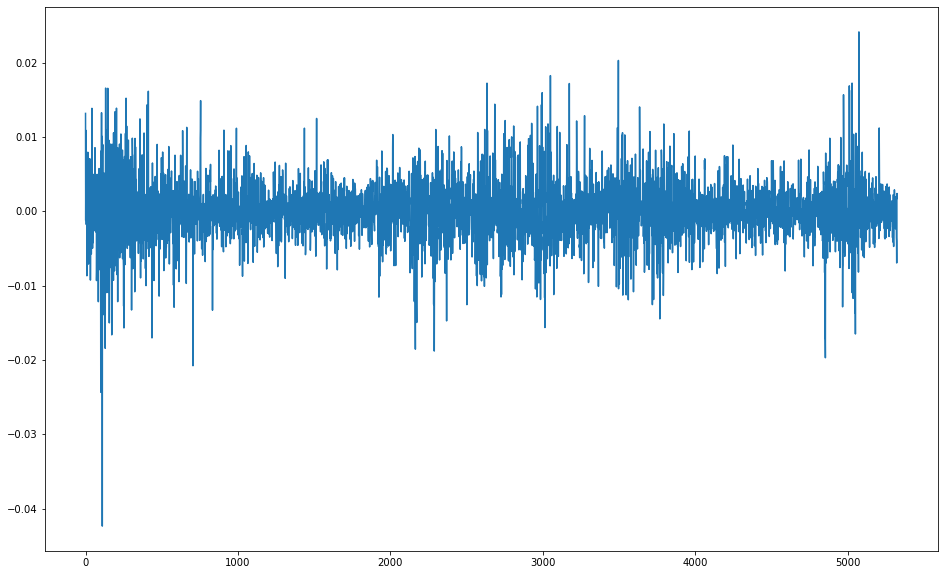

In [274]:
plt.figure(1, figsize=(16, 10))
plt.plot(all_signal);

- check the statistics of the signal

In [275]:
print("kurtosis=", kurtosis(all_signal, fisher=False), " skew=", skew(all_signal))
## kurtosis= 8.531024960127679  skew= -0.18608983129396112
## we can see it has very fat tails
## usually we don't adjust for response because we want to profit from the fat tails

kurtosis= 8.531024960127679  skew= -0.18608983129396112


- let's try some vanish signal

kurtosis= 6.231741293113087  skew= 0.04706924460768927


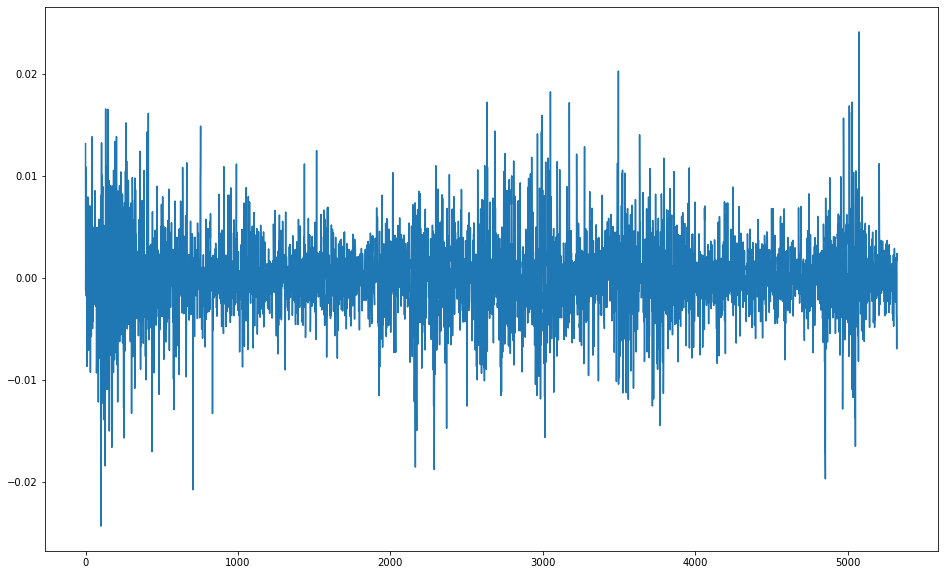

In [276]:
all_signal = load(SAVE_PATH+"/all signal/"+ product_list[0]+ ".ret."+str(period)+".pkl")
vanish_signal = vanish_thre(all_signal, 0.041)
print("kurtosis=", kurtosis(vanish_signal, fisher=False), " skew=", skew(vanish_signal))
## kurtosis= 6.231741293113087  skew= 0.04706924460768927
plt.figure(1, figsize=(16, 10))
plt.plot(vanish_signal);

kurtosis= 5.822801418710083  skew= 0.04869705892622108


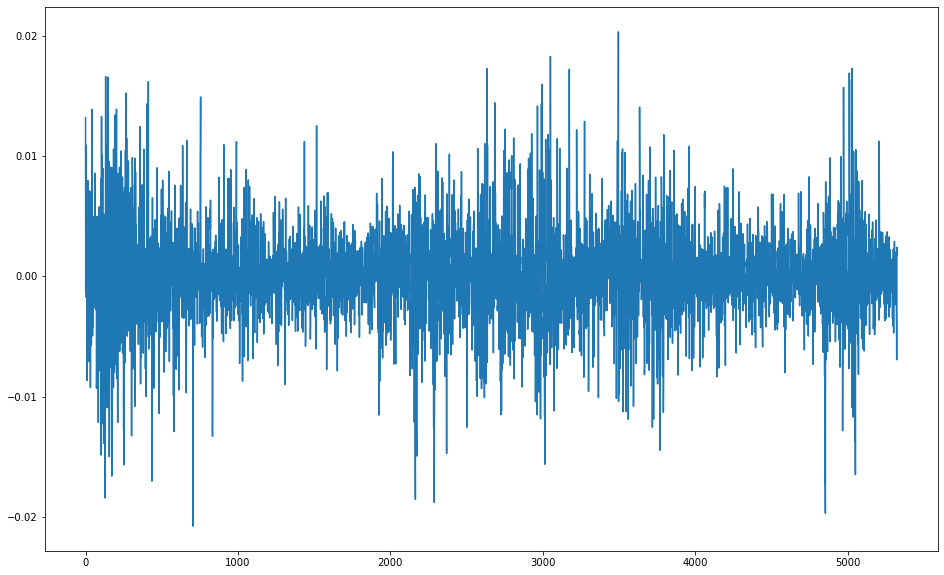

In [277]:
all_signal = load(SAVE_PATH+"/all signal/"+ product_list[0]+ ".ret."+str(period)+".pkl")
vanish_signal = vanish_thre(all_signal, 0.021)
print("kurtosis=", kurtosis(vanish_signal, fisher=False), " skew=", skew(vanish_signal))
plt.figure(1, figsize=(16, 10))
plt.plot(vanish_signal);
## kurtosis= 5.822801418710083  skew= 0.04869705892622108

kurtosis= 3.805994417959  skew= 0.1329732011138275


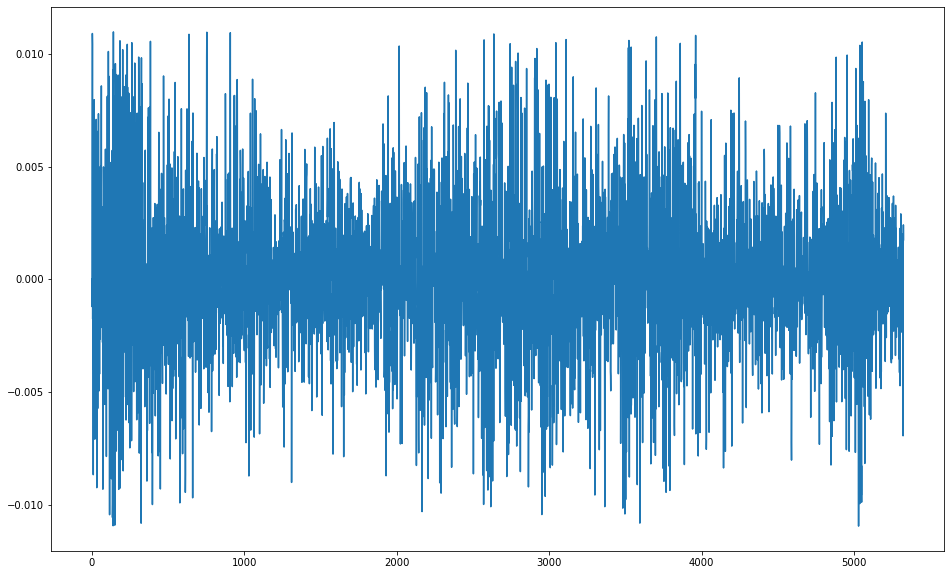

In [278]:
all_signal = load(SAVE_PATH+"/all signal/"+ product_list[0]+ ".ret."+str(period)+".pkl")
vanish_signal = vanish_thre(all_signal, 0.011)
print("kurtosis=", kurtosis(vanish_signal, fisher=False), " skew=", skew(vanish_signal))
plt.figure(1, figsize=(16, 10))
plt.plot(vanish_signal);
## kurtosis= 3.805994417959  skew= 0.1329732011138275

- it seems 0.01 fits our previous standard for predictive signals
- but now we works for response so there may be some differences


- let's create signals with vanish as well
- our function can support only one parameter so we create twice

In [34]:
class foctor_ret_period_004(factor_template):
    factor_name = "ret.period.004"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return vanish_thre(fcum(data["ret"],period), 0.041).values
    
y4 = foctor_ret_period_004()



In [35]:
class foctor_ret_period_002(factor_template):
    factor_name = "ret.period.002"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return vanish_thre(fcum(data["ret"],period), 0.021).values
    
y2 = foctor_ret_period_002()



In [36]:
for product in product_list:
    create_signal_path(y4, product, SAVE_PATH)

e:/intern/tmp pkl/IF/ret.1024.004
e:/intern/tmp pkl/IF/ret.2048.004
e:/intern/tmp pkl/IF/ret.4096.004
e:/intern/tmp pkl/IH/ret.1024.004
e:/intern/tmp pkl/IH/ret.2048.004
e:/intern/tmp pkl/IH/ret.4096.004
e:/intern/tmp pkl/IC/ret.1024.004
e:/intern/tmp pkl/IC/ret.2048.004
e:/intern/tmp pkl/IC/ret.4096.004
e:/intern/tmp pkl/T/ret.1024.004
e:/intern/tmp pkl/T/ret.2048.004
e:/intern/tmp pkl/T/ret.4096.004
e:/intern/tmp pkl/TF/ret.1024.004
e:/intern/tmp pkl/TF/ret.2048.004
e:/intern/tmp pkl/TF/ret.4096.004


In [37]:
for product in product_list:
    create_signal_path(y2, product, SAVE_PATH)

e:/intern/tmp pkl/IF/ret.1024.002
e:/intern/tmp pkl/IF/ret.2048.002
e:/intern/tmp pkl/IF/ret.4096.002
e:/intern/tmp pkl/IH/ret.1024.002
e:/intern/tmp pkl/IH/ret.2048.002
e:/intern/tmp pkl/IH/ret.4096.002
e:/intern/tmp pkl/IC/ret.1024.002
e:/intern/tmp pkl/IC/ret.2048.002
e:/intern/tmp pkl/IC/ret.4096.002
e:/intern/tmp pkl/T/ret.1024.002
e:/intern/tmp pkl/T/ret.2048.002
e:/intern/tmp pkl/T/ret.4096.002
e:/intern/tmp pkl/TF/ret.1024.002
e:/intern/tmp pkl/TF/ret.2048.002
e:/intern/tmp pkl/TF/ret.4096.002


In [38]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=y4, product=product, HEAD_PATH=SAVE_PATH)
;
## Wall time: 9min 30s

Wall time: 9min 30s


''

In [39]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=y2, product=product, HEAD_PATH=SAVE_PATH)
;
## Wall time: 5min 31s

Wall time: 5min 31s


''

In [40]:
class foctor_ret_period_001(factor_template):
    factor_name = "ret.period.001"
    
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    
    def formula(self, data, period):
        return vanish_thre(fcum(data["ret"],period), 0.011).values
    
y1 = foctor_ret_period_001()


In [41]:
for product in product_list:
    create_signal_path(y1, product, SAVE_PATH)

e:/intern/tmp pkl/IF/ret.1024.001
e:/intern/tmp pkl/IF/ret.2048.001
e:/intern/tmp pkl/IF/ret.4096.001
e:/intern/tmp pkl/IH/ret.1024.001
e:/intern/tmp pkl/IH/ret.2048.001
e:/intern/tmp pkl/IH/ret.4096.001
e:/intern/tmp pkl/IC/ret.1024.001
e:/intern/tmp pkl/IC/ret.2048.001
e:/intern/tmp pkl/IC/ret.4096.001
e:/intern/tmp pkl/T/ret.1024.001
e:/intern/tmp pkl/T/ret.2048.001
e:/intern/tmp pkl/T/ret.4096.001
e:/intern/tmp pkl/TF/ret.1024.001
e:/intern/tmp pkl/TF/ret.2048.001
e:/intern/tmp pkl/TF/ret.4096.001


In [42]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=y1, product=product, HEAD_PATH=SAVE_PATH)
;
##Wall time:  4min 20s

Wall time: 4min 20s


''

- now we have 3 response values: future return, future return cut off at 0.02, future return cut of at 0.01


- let's see how they perform with predictive signals


- at first we need to make sum changes 
- we can check the result

In [279]:
sum(train_sample)
## 510

510

In [280]:
sum(test_sample)
## 582

582

- at first we fit a linear regression model without any regularization
- we need to know the length of each day

In [45]:
## coutn the number of signals of every day
def count_daily_num(x, period):
    data = load(x)
    return np.floor(sum(data["good"])/period)

In [46]:
os.makedirs(HEAD_PATH+"/daily num", exist_ok=True)

In [47]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    daily_num = pd.Series(parLapply(CORE_NUM, file_list, count_daily_num, period=period))
    save(daily_num, HEAD_PATH+"/daily num/"+product+".pkl")
    
# Wall time: 9min 33s


Wall time: 9min 33s


- we don't need to do it every time

In [281]:
daily_num = load(HEAD_PATH+"/daily num/"+product+".pkl")

- we get the number of independent training samples

In [282]:
n_train = sum(daily_num[train_sample])
n_train
## 1069.0

1069.0

- we can see there there are not many samples
- but they are independent signals because we choose one sample out of every period samples
- for every tick, we predict the price return of next 4096 ticks
- so only 1/4096 of them are independent

- number of signals

In [283]:
n_signal = len(signal_list)
n_signal
## 45

45

In [73]:
## construct the signal matrix
## we want to put multiple signals into a matrix
def get_sample_signal(good_night_files, sample, product, signal_list, period, daily_num):
    n_samples = sum(daily_num[sample]) ## tottal number of samples
    n_days = sum(sample)  ## number of days
    n_signal = len(signal_list) ## number of signals, the matrix would be n_samples*n_signal
    all_signal =  np.ndarray(shape=(int(n_samples),n_signal))
    cur = 0
    for file in good_night_files[sample]:
        #data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        good = load(SAVE_PATH + "/good pkl/" + product +"/"+file)
        chosen = (np.arange(sum(good))+1) % period==0
        n_chosen = sum(chosen)
        for i in range(n_signal):
            signal_name = signal_list[i]
            S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
            S = S[good]
            signal = S[(np.arange(len(S))+1) % period == 0]
            signal[np.isnan(signal)] = 0 ## the ret.cor has some bad records
            signal[np.isinf(signal)] = 0 ## the ret.cor has some bad records
            all_signal[cur:(cur+n_chosen),i] = signal
        cur = cur+n_chosen
    all_signal = pd.DataFrame(all_signal, columns=signal_list)
    return all_signal

- Now we get the train and test samples

In [63]:
os.makedirs(HEAD_PATH+"/train test mat/", exist_ok=True)

In [74]:
%%time
for product in product_list:
    print(product)
    daily_num = load(HEAD_PATH+"/daily num/"+product+".pkl")
    train_mat = get_sample_signal(all_dates, train_sample, product, 
                                  np.append(signal_list, ["ret."+str(period),  "ret."+str(period)+".001","ret."+str(period)+".002","ret."+str(period)+".004" ]), 
                                  period, daily_num)
    os.makedirs(HEAD_PATH+"/train test mat/"+product, exist_ok=True)
    save(train_mat, HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    
# IF
# IH
# IC
# T
# TF
# Wall time: 31min 25s

IF
IH
IC
T
TF
Wall time: 31min 25s


In [284]:
import  sklearn.preprocessing

In [285]:
ori_mat = load(HEAD_PATH+"/train test mat/"+product_list[0]+".train.mat.pkl")
ori_mat.columns

Index(['trade.imb.4096', 'total.trade.imb.4096', 'nr.4096', 'dbook.4096',
       'range.pos.4096', 'price.osci.4096', 'ma.dif.10.4096', 'kdj.k.4096',
       'kdj.j.4096', 'trade.imb.range.4096', 'total.trade.imb.range.4096',
       'nr.range.4096', 'dbook.range.4096', 'range.pos.range.4096',
       'price.osci.range.4096', 'ma.dif.10.range.4096', 'kdj.k.range.4096',
       'kdj.j.range.4096', 'trade.imb.std.4096', 'total.trade.imb.std.4096',
       'nr.std.4096', 'dbook.std.4096', 'range.pos.std.4096',
       'price.osci.std.4096', 'ma.dif.10.std.4096', 'kdj.k.std.4096',
       'kdj.j.std.4096', 'trade.imb.volume.open.ratio.4096',
       'total.trade.imb.volume.open.ratio.4096', 'nr.volume.open.ratio.4096',
       'dbook.volume.open.ratio.4096', 'range.pos.volume.open.ratio.4096',
       'price.osci.volume.open.ratio.4096', 'ma.dif.10.volume.open.ratio.4096',
       'kdj.k.volume.open.ratio.4096', 'kdj.j.volume.open.ratio.4096',
       'trade.imb.trend.index.4096', 'total.trade.imb.tre

- we add the y signal

- we can check the names

In [286]:
train_mat = load(HEAD_PATH+"/train test mat/"+product_list[0]+".train.mat.pkl")
train_mat = pd.DataFrame(data=sklearn.preprocessing.scale(train_mat, with_mean=False), columns=ori_mat.columns)
print(product_list[0], train_mat.shape)
for product in product_list[1:3]:
    cur_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    ## standardize the matrix before combination, with_mean=False,we don't use intercept
    cur_mat = pd.DataFrame(data=sklearn.preprocessing.scale(cur_mat, with_mean=False), columns=ori_mat.columns)
    print(product, cur_mat.shape)
    train_mat = train_mat.append(cur_mat)
    
# IF (2045, 49)
# IH (1431, 49)
# IC (2048, 49)


IF (2045, 49)
IH (1431, 49)
IC (2048, 49)


In [287]:
train_mat.shape

# (5524, 49)

(5524, 49)

- at first we can fit a linear regression to calcualte t-statistics 

In [288]:
import statsmodels.formula.api as smf

In [291]:
formula = "train_mat['ret."+str(period)+"'] ~ train_mat['nr."+str(period)+"'] + 0"
formula
## "train_mat['ret.4096'] ~ train_mat['nr.4096'] + 0"

"train_mat['ret.4096'] ~ train_mat['nr.4096'] + 0"

In [292]:
fit_one_lm = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-2]]).fit()
print(fit_one_lm.summary())

#    OLS Regression Results                                  
# ==========================================================================================
# Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.000
# Model:                               OLS   Adj. R-squared (uncentered):             -0.000
# Method:                    Least Squares   F-statistic:                            0.08203
# Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                       0.775
# Time:                           08:43:43   Log-Likelihood:                         -7839.7
# No. Observations:                   5524   AIC:                                  1.568e+04
# Df Residuals:                       5523   BIC:                                  1.569e+04
# Df Model:                              1                                                  
# Covariance Type:               nonrobust                                                  
# ========================================================================================
#                            coef    std err          t      P>|t|      [0.025      0.975]
# ----------------------------------------------------------------------------------------
# train_mat['nr.4096']     0.0038      0.013      0.286      0.775      -0.022       0.030
# ==============================================================================
# Omnibus:                     1941.545   Durbin-Watson:                   2.079
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48211.212
# Skew:                          -1.117   Prob(JB):                         0.00
# Kurtosis:                      17.299   Cond. No.                         1.00
# ==============================================================================

# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

                                  OLS Regression Results                                  
Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.000
Model:                               OLS   Adj. R-squared (uncentered):             -0.000
Method:                    Least Squares   F-statistic:                            0.08203
Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                       0.775
Time:                           08:43:43   Log-Likelihood:                         -7839.7
No. Observations:                   5524   AIC:                                  1.568e+04
Df Residuals:                       5523   BIC:                                  1.569e+04
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-

In [293]:
## function to calculate t-stat
def get_t_value(train_mat, signal, response):
    beta = np.sum(train_mat[signal]*train_mat[response])/sum(train_mat[signal]**2) ## regressio coef
    sigma = np.sqrt(np.sum((train_mat[signal]*beta-train_mat[response])**2) / (len(train_mat)-1)) 
    v = np.sqrt(np.sum(train_mat[signal]**2)) ## sigma/v is the standard devication of beta_hat
    return beta/sigma*v

- we can see our function is correct
- now let's use this function to calcualte all t-stat of each variable

In [294]:
signal_list = np.array(signal_list)
t_stat = list(map(lambda x: get_t_value(train_mat=train_mat, signal=x, response="ret."+str(period)), signal_list))
t_stat

# [-1.1220892965224458,
#  -1.3718134821680819,
#  0.28640750256501585,
#  -0.5313382267966861,
#  0.24459535805302515,
#  0.48803080689261136,
#  -0.4277925475449082,
#  0.7599254494758654,
#  0.3194593929612323,
#  -2.6495300025412276,
#  -2.677901458623847,
#  -1.4379553006711998,
#  -1.0222819187780277,
#  -0.8562620718346114,
#  -0.31265447995105106,
#  -2.091041091157486,
#  -0.6466068690265188,
#  -0.9990674179312914,
#  -2.7959525884699445,
#  -2.748721824127822,
#  -1.3228002464811608,
#  -1.5686403928538217,
#  -0.9483095618484573,
#  -0.05604445539261336,
#  -2.0327162170128403,
#  -0.522608946166791,
#  -0.9393516639511645,
#  -1.3661090276432317,
#  -1.2287410642157575,
#  -0.4082021785211094,
#  -0.6019610606801686,
#  -0.028817989666848887,
#  0.19334908026230144,
#  -1.1324541736451117,
#  0.5564800411127467,
#  0.1773190492168976,
#  -1.543038433069078,
#  -1.595231409606205,
#  0.5068212917007838,
#  -0.11531856590594204,
#  0.6178846408027762,
#  0.8361862257544428,
#  -0.453536842592083,
#  0.7946987323546352,
#  0.6613019091416268]

[-1.1220892965224458,
 -1.3718134821680819,
 0.28640750256501585,
 -0.5313382267966861,
 0.24459535805302515,
 0.48803080689261136,
 -0.4277925475449082,
 0.7599254494758654,
 0.3194593929612323,
 -2.6495300025412276,
 -2.677901458623847,
 -1.4379553006711998,
 -1.0222819187780277,
 -0.8562620718346114,
 -0.31265447995105106,
 -2.091041091157486,
 -0.6466068690265188,
 -0.9990674179312914,
 -2.7959525884699445,
 -2.748721824127822,
 -1.3228002464811608,
 -1.5686403928538217,
 -0.9483095618484573,
 -0.05604445539261336,
 -2.0327162170128403,
 -0.522608946166791,
 -0.9393516639511645,
 -1.3661090276432317,
 -1.2287410642157575,
 -0.4082021785211094,
 -0.6019610606801686,
 -0.028817989666848887,
 0.19334908026230144,
 -1.1324541736451117,
 0.5564800411127467,
 0.1773190492168976,
 -1.543038433069078,
 -1.595231409606205,
 0.5068212917007838,
 -0.11531856590594204,
 0.6178846408027762,
 0.8361862257544428,
 -0.453536842592083,
 0.7946987323546352,
 0.6613019091416268]

- if we use t.stat value of 2 to filter out good signals, we have

In [295]:
signal_list[np.where(np.abs(t_stat)>2)]
# array(['dbook.4096', 'dbook.range.4096', 'range.pos.range.4096',
#        'dbook.std.4096', 'range.pos.std.4096',
#        'dbook.volume.open.ratio.4096', 'dbook.trend.index.4096'],
#       dtype='<U33')

array(['trade.imb.range.4096', 'total.trade.imb.range.4096',
       'ma.dif.10.range.4096', 'trade.imb.std.4096',
       'total.trade.imb.std.4096', 'ma.dif.10.std.4096'], dtype='<U38')

In [296]:
good_index = signal_list[np.abs(t_stat)>2]
good_index
# array(['trade.imb.range.4096', 'total.trade.imb.range.4096',
#        'ma.dif.10.range.4096', 'trade.imb.std.4096',
#        'total.trade.imb.std.4096', 'ma.dif.10.std.4096'], dtype='<U38')

array(['trade.imb.range.4096', 'total.trade.imb.range.4096',
       'ma.dif.10.range.4096', 'trade.imb.std.4096',
       'total.trade.imb.std.4096', 'ma.dif.10.std.4096'], dtype='<U38')

- but we know a single signal works well doesn't mean it works well when combined with other signals
- signals have correlation, if 10 highly correlated signals together would not make prediction better

In [297]:
train_mat[good_index].corr()

#  trade.imb.range.4096 	total.trade.imb.range.4096 	ma.dif.10.range.4096 	trade.imb.std.4096 	total.trade.imb.std.4096 	ma.dif.10.std.4096
# trade.imb.range.4096 	1.000000 	0.894080 	0.429414 	0.970139 	0.868005 	0.421171
# total.trade.imb.range.4096 	0.894080 	1.000000 	0.565590 	0.860695 	0.970430 	0.562286
# ma.dif.10.range.4096 	0.429414 	0.565590 	1.000000 	0.438599 	0.595579 	0.983326
# trade.imb.std.4096 	0.970139 	0.860695 	0.438599 	1.000000 	0.890591 	0.427867
# total.trade.imb.std.4096 	0.868005 	0.970430 	0.595579 	0.890591 	1.000000 	0.594257
# ma.dif.10.std.4096 	0.421171 	0.562286 	0.983326 	0.427867 	0.594257 	1.000000

,trade.imb.range.4096,total.trade.imb.range.4096,ma.dif.10.range.4096,trade.imb.std.4096,total.trade.imb.std.4096,ma.dif.10.std.4096
trade.imb.range.4096,1.000000,0.894080,0.429414,0.970139,0.868005,0.421171
total.trade.imb.range.4096,0.894080,1.000000,0.565590,0.860695,0.970430,0.562286
ma.dif.10.range.4096,0.429414,0.565590,1.000000,0.438599,0.595579,0.983326
trade.imb.std.4096,0.970139,0.860695,0.438599,1.000000,0.890591,0.427867
total.trade.imb.std.4096,0.868005,0.970430,0.595579,0.890591,1.000000,0.594257
ma.dif.10.std.4096,0.421171,0.562286,0.983326,0.427867,0.594257,1.000000


In [97]:
corr = train_mat[good_index].corr()

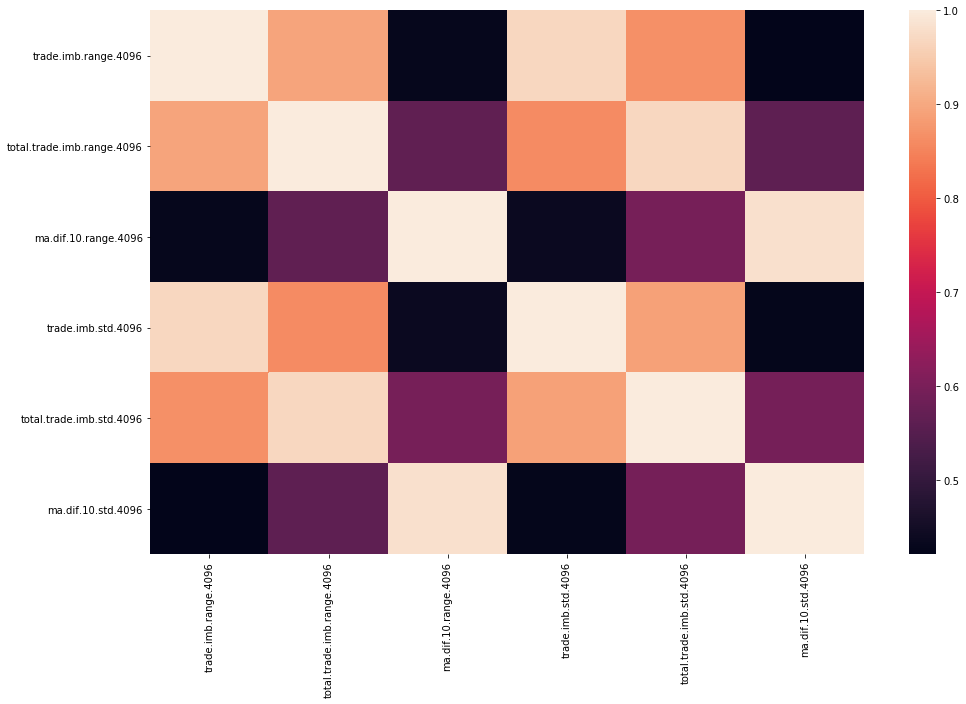

In [98]:
import seaborn as sns
plt.figure(figsize=(16,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

- we can see that some of them has very high correlation

- we can add each signal one by one to a model and check how the performance envolves

In [298]:
np.argmax(np.abs(t_stat))
## [1] 18

18

In [299]:
signal_list[np.argmax(np.abs(t_stat))]
## 'trade.imb.std.4096'

'trade.imb.std.4096'

- the first signal is the signal dbook.std.4096


- to select the second signal, we can use forward selction

In [300]:
import statsmodels.formula.api as smf

## forward selection of signals
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    chosen_signals = []
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} - 1".format("data['"+response+"']",
                                           ' + '.join(selected + ["data['"+candidate+"']"]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append("data['"+best_candidate+"']")
            current_score = best_new_score
            chosen_signals.append(best_candidate)
    formula = "{} ~ {} - 1".format("data['"+response+"']",
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return OrderedDict([("model", model), ("chosen.signals", chosen_signals)])

In [301]:
result = forward_selected(train_mat[train_mat.columns[:-3]], "ret."+str(period))

In [302]:
save(result, HEAD_PATH+"/index_all_forwatd_select.pkl")

In [303]:
result = load(HEAD_PATH+"/index_all_forwatd_select.pkl");

In [304]:
result["model"].model.formula
# "data['ret.4096'] ~ data['trade.imb.std.4096'] + data['trade.imb.volume.open.ratio.4096'] + data['kdj.k.trend.index.4096'] + data['kdj.j.range.4096'] + data['price.osci.std.4096'] + data['ma.dif.10.std.4096'] + data['price.osci.4096'] + data['total.trade.imb.range.4096'] + data['price.osci.range.4096'] + data['kdj.j.std.4096'] + data['trade.imb.range.4096'] - 1"

"data['ret.4096'] ~ data['trade.imb.std.4096'] + data['trade.imb.volume.open.ratio.4096'] + data['kdj.k.trend.index.4096'] + data['kdj.j.range.4096'] + data['price.osci.std.4096'] + data['ma.dif.10.std.4096'] + data['price.osci.4096'] + data['total.trade.imb.range.4096'] + data['price.osci.range.4096'] + data['kdj.j.std.4096'] + data['trade.imb.range.4096'] - 1"

In [305]:
result["chosen.signals"]

# ['trade.imb.std.4096',
#  'trade.imb.volume.open.ratio.4096',
#  'kdj.k.trend.index.4096',
#  'kdj.j.range.4096',
#  'price.osci.std.4096',
#  'ma.dif.10.std.4096',
#  'price.osci.4096',
#  'total.trade.imb.range.4096',
#  'price.osci.range.4096',
#  'kdj.j.std.4096',
#  'trade.imb.range.4096']

['trade.imb.std.4096',
 'trade.imb.volume.open.ratio.4096',
 'kdj.k.trend.index.4096',
 'kdj.j.range.4096',
 'price.osci.std.4096',
 'ma.dif.10.std.4096',
 'price.osci.4096',
 'total.trade.imb.range.4096',
 'price.osci.range.4096',
 'kdj.j.std.4096',
 'trade.imb.range.4096']

- now we can check each model to see how the pnl evolves


- we can also get the test signals


- we can get the test samples first

In [108]:
%%time
for product in product_list:
    print(product)
    daily_num = load(HEAD_PATH+"/daily num/"+product+".pkl")
    test_mat = get_sample_signal(all_dates, test_sample, product, 
                                  np.append(signal_list, ["ret."+str(period),  "ret."+str(period)+".001","ret."+str(period)+".002","ret."+str(period)+".004"]), 
                                  period, daily_num)
    os.makedirs(HEAD_PATH+"/train test mat/"+product, exist_ok=True)
    save(test_mat, HEAD_PATH+"/train test mat/"+product+".test.mat.pkl")
    
# IF
# IH
# IC
# T
# TF
# Wall time: 56min 30s



IF
IH
IC
T
TF
Wall time: 56min 30s


- now let's fit the first model

In [306]:
first_signal = "trade.imb.std."+str(period)
y_signal = "ret."+str(period)
formula = "train_mat['" + y_signal+"'] ~ train_mat['"+first_signal+"']+0"
formula

# "train_mat['ret.4096'] ~ train_mat[''trade.imb.std.4096']+0"

"train_mat['ret.4096'] ~ train_mat['trade.imb.std.4096']+0"

In [307]:
fit1_lm = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-3]]).fit()
print(fit1_lm.summary())

#  OLS Regression Results                                  
# ==========================================================================================
# Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.001
# Model:                               OLS   Adj. R-squared (uncentered):              0.001
# Method:                    Least Squares   F-statistic:                              7.817
# Date:                   Thu, 16 Jul 2020   Prob (F-statistic):                     0.00519
# Time:                           14:58:28   Log-Likelihood:                         -7835.8
# No. Observations:                   5524   AIC:                                  1.567e+04
# Df Residuals:                       5523   BIC:                                  1.568e+04
# Df Model:                              1                                                  
# Covariance Type:               nonrobust                                                  
# ===================================================================================================
#                                       coef    std err          t      P>|t|      [0.025      0.975]
# ---------------------------------------------------------------------------------------------------
# train_mat['trade.imb.std.4096']    -0.0303      0.011     -2.796      0.005      -0.052      -0.009
# ==============================================================================
# Omnibus:                     1990.354   Durbin-Watson:                   2.050
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48851.408
# Skew:                          -1.163   Prob(JB):                         0.00
# Kurtosis:                      17.382   Cond. No.                         1.00
# ==============================================================================

# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

                                  OLS Regression Results                                  
Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.001
Model:                               OLS   Adj. R-squared (uncentered):              0.001
Method:                    Least Squares   F-statistic:                              7.817
Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                     0.00519
Time:                           08:45:58   Log-Likelihood:                         -7835.8
No. Observations:                   5524   AIC:                                  1.567e+04
Df Residuals:                       5523   BIC:                                  1.568e+04
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025   

- we can see that the single R-square is already 0.0005814431935065034


- now we want to get the prediction value

In [308]:
strat = "one."+str(period)

- create a directory for the first strate

In [309]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

- we get the coefficiton of fit1.lm

In [310]:
fit_coef = fit1_lm.params.values
fit_coef
# array([-0.03033512])



array([-0.03033512])

- but since we have standardize the training samples before regrssion
- we must revert the result to original scale

In [311]:
train_std = dict([])
for product in product_list:
    cur_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    train_std[product] = np.std(cur_mat)

In [312]:
coef = fit_coef*train_std[product_list[0]][y_signal]/train_std[product_list[0]][first_signal]
coef
## array([-0.00087249])

array([-0.00087249])

In [117]:
%%time
for product in product_list[:3]:
    coef = fit_coef*train_std[product][y_signal]/train_std[product][first_signal]
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=[first_signal], coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;

## Wall time: 2min 24s

Wall time: 2min 24s


''

In [119]:
%%time
for product in product_list[:3]:
    par_get_all_signal("one.4096", all_dates, product, 4096, SAVE_PATH=SAVE_PATH)
## Wall time: 59.2 s

Wall time: 59.2 s


In [120]:
%%time
for product in product_list[:3]:
    spread = product_info[product]["spread"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    tranct = product_info[product]["tranct"]
    evaluate_signal("one", all_dates, product, 2, 20,
                    CORE_NUM,  HEAD_PATH, SAVE_PATH, period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# Wall time: 6min 43s


reverse=1
reverse=1
reverse=1
Wall time: 6min 43s


In [123]:
product = "IF"
spread = product_info[product]["spread"]
signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"one.4096"+".trend.pkl")
train_stat = signal_stat["train.stat"]
good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
sum(good_strat)

0

In [121]:
for product in product_list[:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"one.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

# IF train sharpe  nan test sharpe  nan
# IH train sharpe  0.6938150356814716 test sharpe  1.063853128797169
# IC train sharpe  nan test sharpe  nan


IF train sharpe  nan test sharpe  nan
IH train sharpe  0.6938150356814716 test sharpe  1.063853128797169
IC train sharpe  nan test sharpe  nan


- then we work similar to previous common signals

- now we try to add a few new signal

In [313]:
y_signal = "ret."+str(period)
formula = "train_mat['" + y_signal+"'] ~ "
n_signal = int(len(result["chosen.signals"])/2)
for signal in result["chosen.signals"][:n_signal]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula

## "train_mat['ret.4096'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+0"

"train_mat['ret.4096'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+0"

In [314]:
fit_half_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-3]]).fit()
print(fit_half_lm.summary())

#   OLS Regression Results                                  
# ==========================================================================================
# Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.003
# Model:                               OLS   Adj. R-squared (uncentered):              0.002
# Method:                    Least Squares   F-statistic:                              3.439
# Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                     0.00419
# Time:                           08:46:27   Log-Likelihood:                         -7831.1
# No. Observations:                   5524   AIC:                                  1.567e+04
# Df Residuals:                       5519   BIC:                                  1.571e+04
# Df Model:                              5                                                  
# Covariance Type:               nonrobust                                                  
# =================================================================================================================
#                                                     coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------------------------------
# train_mat['trade.imb.std.4096']                  -0.0552      0.020     -2.745      0.006      -0.095      -0.016
# train_mat['trade.imb.volume.open.ratio.4096']     0.0255      0.017      1.535      0.125      -0.007       0.058
# train_mat['kdj.k.trend.index.4096']               0.0363      0.022      1.681      0.093      -0.006       0.079
# train_mat['kdj.j.range.4096']                    -0.0641      0.028     -2.249      0.025      -0.120      -0.008
# train_mat['price.osci.std.4096']                  0.0390      0.027      1.443      0.149      -0.014       0.092
# ==============================================================================
# Omnibus:                     2002.609   Durbin-Watson:                   2.055
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49104.068
# Skew:                          -1.173   Prob(JB):                         0.00
# Kurtosis:                      17.416   Cond. No.                         5.11
# ==============================================================================

# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

                                  OLS Regression Results                                  
Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.003
Model:                               OLS   Adj. R-squared (uncentered):              0.002
Method:                    Least Squares   F-statistic:                              3.439
Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                     0.00419
Time:                           08:46:27   Log-Likelihood:                         -7831.1
No. Observations:                   5524   AIC:                                  1.567e+04
Df Residuals:                       5519   BIC:                                  1.571e+04
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
                                                    coef    std err          t      P>|t| 

In [315]:
strat = "half."+str(period)
os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_half_lm.params.values
fit_coef
# array([-0.05517363,  0.02547844,  0.0362655 , -0.06406452,  0.03897671])

array([-0.05517363,  0.02547844,  0.0362655 , -0.06406452,  0.03897671])

In [316]:
train_std_mat = dict([])
for product in product_list[0:3]:
    cur_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    train_std_mat[product] = np.std(cur_mat)

In [317]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [318]:
%%time
for product in product_list[0:3]:
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][result["chosen.signals"][:n_signal]]
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=result["chosen.signals"][:n_signal], coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;
# Wall time:  4min 30s

Wall time: 1min


''

In [319]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("half.4096", all_dates, product, 4096, SAVE_PATH="e:/intern")
## Wall time: 26.9 s

Wall time: 27 s


In [320]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("half", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# Wall time: 5min 13s



reverse=1
reverse=1
reverse=1
Wall time: 5min 13s


In [321]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"half.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

# IF train sharpe  nan test sharpe  nan
# IH train sharpe  0.2589940820255803 test sharpe  -0.5370049335926701
# IC train sharpe  0.14234337497465366 test sharpe  0.13496819089995118





IF train sharpe  nan test sharpe  nan
IH train sharpe  0.2589940820255803 test sharpe  -0.5370049335926701
IC train sharpe  0.14234337497465366 test sharpe  0.13496819089995118


In [322]:
y_signal = "ret."+str(period)
formula = "train_mat['" + y_signal+"'] ~ "
for signal in result["chosen.signals"]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula

# "train_mat['ret.4096'] ~ +train_mat['dbook.volume.open.ratio.4096']+train_mat['trade.imb.std.4096']+train_mat['trade.imb.range.4096']+train_mat['range.pos.range.4096']+train_mat['nr.trend.index.4096']+train_mat['ma.dif.10.range.4096']+train_mat['nr.range.4096']+train_mat['price.osci.std.4096']+train_mat['price.osci.volume.open.ratio.4096']+train_mat['kdj.j.std.4096']+train_mat['nr.4096']+train_mat['kdj.j.volume.open.ratio.4096']+train_mat['range.pos.volume.open.ratio.4096']+train_mat['nr.volume.open.ratio.4096']+train_mat['ma.dif.10.std.4096']+train_mat['nr.std.4096']+train_mat['price.osci.range.4096']+train_mat['ma.dif.10.4096']+train_mat['dbook.4096']+train_mat['trade.imb.4096']+train_mat['dbook.range.4096']+train_mat['kdj.j.range.4096']+train_mat['kdj.k.4096']+0"

"train_mat['ret.4096'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+train_mat['ma.dif.10.std.4096']+train_mat['price.osci.4096']+train_mat['total.trade.imb.range.4096']+train_mat['price.osci.range.4096']+train_mat['kdj.j.std.4096']+train_mat['trade.imb.range.4096']+0"

In [323]:
np.shape(train_mat)

(5524, 49)

- now we look at the full model

In [324]:
fit_full_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-3]]).fit()
print(fit_full_lm.summary())

# OLS Regression Results                                  
# ==========================================================================================
# Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.006
# Model:                               OLS   Adj. R-squared (uncentered):              0.004
# Method:                    Least Squares   F-statistic:                              3.176
# Date:                   Thu, 16 Jul 2020   Prob (F-statistic):                    0.000262
# Time:                           16:56:14   Log-Likelihood:                         -7822.3
# No. Observations:                   5524   AIC:                                  1.567e+04
# Df Residuals:                       5513   BIC:                                  1.574e+04
# Df Model:                             11                                                  
# Covariance Type:               nonrobust                                                  
# =================================================================================================================
#                                                     coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------------------------------
# train_mat['trade.imb.std.4096']                  -0.0935      0.062     -1.512      0.131      -0.215       0.028
# train_mat['trade.imb.volume.open.ratio.4096']     0.0109      0.018      0.603      0.547      -0.025       0.046
# train_mat['kdj.k.trend.index.4096']               0.0222      0.025      0.898      0.369      -0.026       0.071
# train_mat['kdj.j.range.4096']                     0.2086      0.118      1.770      0.077      -0.022       0.440
# train_mat['price.osci.std.4096']                  0.5740      0.159      3.615      0.000       0.263       0.885
# train_mat['ma.dif.10.std.4096']                  -0.1132      0.041     -2.751      0.006      -0.194      -0.033
# train_mat['price.osci.4096']                     -0.0517      0.037     -1.394      0.163      -0.124       0.021
# train_mat['total.trade.imb.range.4096']          -0.0429      0.036     -1.182      0.237      -0.114       0.028
# train_mat['price.osci.range.4096']               -0.3721      0.155     -2.407      0.016      -0.675      -0.069
# train_mat['kdj.j.std.4096']                      -0.2784      0.131     -2.127      0.033      -0.535      -0.022
# train_mat['trade.imb.range.4096']                 0.0998      0.073      1.368      0.171      -0.043       0.243
# ==============================================================================
# Omnibus:                     1999.984   Durbin-Watson:                   2.051
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48991.148
# Skew:                          -1.171   Prob(JB):                         0.00
# Kurtosis:                      17.400   Cond. No.                         54.6
# ==============================================================================

# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

                                  OLS Regression Results                                  
Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.006
Model:                               OLS   Adj. R-squared (uncentered):              0.004
Method:                    Least Squares   F-statistic:                              3.176
Date:                   Fri, 17 Jul 2020   Prob (F-statistic):                    0.000262
Time:                           09:06:01   Log-Likelihood:                         -7822.3
No. Observations:                   5524   AIC:                                  1.567e+04
Df Residuals:                       5513   BIC:                                  1.574e+04
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
                                                    coef    std err          t      P>|t| 

In [325]:
strat = "full."+str(period)
os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_full_lm.params.values
fit_coef

# array([-0.09353492,  0.0108895 ,  0.02221689,  0.20859455,  0.57403256,
#        -0.11317795, -0.05165849, -0.04288293, -0.37211168, -0.27844569,
#         0.09978319])

array([-0.09353492,  0.0108895 ,  0.02221689,  0.20859455,  0.57403256,
       -0.11317795, -0.05165849, -0.04288293, -0.37211168, -0.27844569,
        0.09978319])

In [326]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [327]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][result["chosen.signals"]]
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=result["chosen.signals"], coef=coef, strat="full.4096", HEAD_PATH=SAVE_PATH)
    
# IF
# IH
# IC
# Wall time: 5min 22s



IF
IH
IC
Wall time: 4min 18s


In [328]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("full.4096", all_dates, product, 4096, SAVE_PATH=SAVE_PATH)
## Wall time: 26.9 s



Wall time: 27 s


In [329]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("full", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# Wall time: 7min 42s



reverse=1
reverse=1
reverse=1
Wall time: 7min 27s


In [333]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

# IF train sharpe  0.4982541328255545 test sharpe  0.8939045222957637
# IH train sharpe  0.21747502986522438 test sharpe  0.19000986556739546
# IC train sharpe  0.5704744572663202 test sharpe  0.9975516857023627



IF train sharpe  0.4982541328255545 test sharpe  0.8939045222957637
IH train sharpe  0.21747502986522438 test sharpe  0.19000986556739546
IC train sharpe  0.5704744572663202 test sharpe  0.9975516857023627


In [336]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>6*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

# IF train sharpe  0.4982541328255545 test sharpe  0.8939045222957637
# IH train sharpe  0.3240357152467307 test sharpe  0.03931881379682338
# IC train sharpe  0.64708946143278 test sharpe  0.9611452048379978

IF train sharpe  0.4982541328255545 test sharpe  0.8939045222957637
IH train sharpe  0.3240357152467307 test sharpe  0.03931881379682338
IC train sharpe  0.64708946143278 test sharpe  0.9611452048379978


In [181]:
y_signal = "ret."+str(period)+".004"
formula = "train_mat['" + y_signal+"'] ~ "
for signal in result["chosen.signals"]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula

## "train_mat['ret.4096.004'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+train_mat['ma.dif.10.std.4096']+train_mat['price.osci.4096']+train_mat['total.trade.imb.range.4096']+train_mat['price.osci.range.4096']+train_mat['kdj.j.std.4096']+train_mat['trade.imb.range.4096']+0"

"train_mat['ret.4096.004'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+train_mat['ma.dif.10.std.4096']+train_mat['price.osci.4096']+train_mat['total.trade.imb.range.4096']+train_mat['price.osci.range.4096']+train_mat['kdj.j.std.4096']+train_mat['trade.imb.range.4096']+0"

In [182]:
fit_004_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-3]]).fit()
strat = "full.004."+str(period)
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_004_lm.params.values
fit_coef

# array([-0.06988272,  0.00931464,  0.01709805,  0.16282351,  0.52789228,
#        -0.13321547, -0.07395245, -0.05171357, -0.27143965, -0.23616145,
#         0.07378305])

array([-0.06988272,  0.00931464,  0.01709805,  0.16282351,  0.52789228,
       -0.13321547, -0.07395245, -0.05171357, -0.27143965, -0.23616145,
        0.07378305])

In [183]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][result["chosen.signals"][:n_signal]]
    print(coef)
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=result["chosen.signals"][:n_signal], 
              coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
    
# IF
# trade.imb.std.4096                 -0.001920
# trade.imb.volume.open.ratio.4096    0.017469
# kdj.k.trend.index.4096              0.000248
# kdj.j.range.4096                    0.000062
# price.osci.std.4096                 0.000818
# ma.dif.10.std.4096                 -0.013392
# price.osci.4096                    -0.000799
# total.trade.imb.range.4096         -0.000157
# price.osci.range.4096              -0.000103
# kdj.j.std.4096                     -0.000375
# trade.imb.range.4096                0.000463
# dtype: float64
# IH
# trade.imb.std.4096                 -0.004314
# trade.imb.volume.open.ratio.4096    0.017410
# kdj.k.trend.index.4096              0.000274
# kdj.j.range.4096                    0.000092
# price.osci.std.4096                 0.001229
# ma.dif.10.std.4096                 -0.019589
# price.osci.4096                    -0.000899
# total.trade.imb.range.4096         -0.000277
# price.osci.range.4096              -0.000155
# kdj.j.std.4096                     -0.000539
# trade.imb.range.4096                0.001066
# dtype: float64
# IC
# trade.imb.std.4096                 -0.000963
# trade.imb.volume.open.ratio.4096    0.020816
# kdj.k.trend.index.4096              0.000320
# kdj.j.range.4096                    0.000033
# price.osci.std.4096                 0.000431
# ma.dif.10.std.4096                 -0.004773
# price.osci.4096                    -0.001010
# total.trade.imb.range.4096         -0.000084
# price.osci.range.4096              -0.000055
# kdj.j.std.4096                     -0.000192
# trade.imb.range.4096                0.000261
# dtype: float64
# Wall time: 1min 21s

IF
trade.imb.std.4096                 -0.001920
trade.imb.volume.open.ratio.4096    0.017469
kdj.k.trend.index.4096              0.000248
kdj.j.range.4096                    0.000062
price.osci.std.4096                 0.000818
ma.dif.10.std.4096                 -0.013392
price.osci.4096                    -0.000799
total.trade.imb.range.4096         -0.000157
price.osci.range.4096              -0.000103
kdj.j.std.4096                     -0.000375
trade.imb.range.4096                0.000463
dtype: float64
IH
trade.imb.std.4096                 -0.004314
trade.imb.volume.open.ratio.4096    0.017410
kdj.k.trend.index.4096              0.000274
kdj.j.range.4096                    0.000092
price.osci.std.4096                 0.001229
ma.dif.10.std.4096                 -0.019589
price.osci.4096                    -0.000899
total.trade.imb.range.4096         -0.000277
price.osci.range.4096              -0.000155
kdj.j.std.4096                     -0.000539
trade.imb.range.4096              

In [185]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("full.004.4096", all_dates, product, 4096)

## Wall time: 26.9 s

Wall time: 26.9 s


In [186]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("full.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# reverse=1
# Wall time: 7min 34s


reverse=1
reverse=1
reverse=1
Wall time: 7min 34s


In [187]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.004.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    train_std = np.std(train_pnl)
    train_pnl = train_pnl/train_std
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)/train_std
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

# IF train sharpe  0.47643126300422955 test sharpe  0.8341947229426923
# IH train sharpe  0.26710057710930923 test sharpe  0.3447237723037833
# IC train sharpe  0.4940957389645839 test sharpe  1.00886456632605



IF train sharpe  0.47643126300422955 test sharpe  0.8341947229426923
IH train sharpe  0.26710057710930923 test sharpe  0.3447237723037833
IC train sharpe  0.4940957389645839 test sharpe  1.00886456632605


In [188]:
y_signal = "ret."+str(period)+".002"
formula = "train_mat['" + y_signal+"'] ~ "
for signal in result["chosen.signals"]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula
# "train_mat['ret.4096.002'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+train_mat['ma.dif.10.std.4096']+train_mat['price.osci.4096']+train_mat['total.trade.imb.range.4096']+train_mat['price.osci.range.4096']+train_mat['kdj.j.std.4096']+train_mat['trade.imb.range.4096']+0"

"train_mat['ret.4096.002'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.volume.open.ratio.4096']+train_mat['kdj.k.trend.index.4096']+train_mat['kdj.j.range.4096']+train_mat['price.osci.std.4096']+train_mat['ma.dif.10.std.4096']+train_mat['price.osci.4096']+train_mat['total.trade.imb.range.4096']+train_mat['price.osci.range.4096']+train_mat['kdj.j.std.4096']+train_mat['trade.imb.range.4096']+0"

In [189]:
fit_002_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-2]]).fit()
strat = "full.002."+str(period)
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_002_lm.params.values
fit_coef

# array([-0.08071327,  0.0239987 ,  0.04017221,  0.17733378,  0.52808262,
#        -0.07864863, -0.04797233, -0.05104639, -0.36791892, -0.24694516,
#         0.04592686])

array([-0.08071327,  0.0239987 ,  0.04017221,  0.17733378,  0.52808262,
       -0.07864863, -0.04797233, -0.05104639, -0.36791892, -0.24694516,
        0.04592686])

In [192]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][result["chosen.signals"]]
    print(coef)
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=result["chosen.signals"], 
              coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;

# IF
# trade.imb.std.4096                 -0.002082
# trade.imb.volume.open.ratio.4096    0.042249
# kdj.k.trend.index.4096              0.000547
# kdj.j.range.4096                    0.000064
# price.osci.std.4096                 0.000768
# ma.dif.10.std.4096                 -0.007422
# price.osci.4096                    -0.000486
# total.trade.imb.range.4096         -0.000146
# price.osci.range.4096              -0.000132
# kdj.j.std.4096                     -0.000368
# trade.imb.range.4096                0.000271
# dtype: float64
# IH
# trade.imb.std.4096                 -0.004567
# trade.imb.volume.open.ratio.4096    0.041116
# kdj.k.trend.index.4096              0.000590
# kdj.j.range.4096                    0.000092
# price.osci.std.4096                 0.001127
# ma.dif.10.std.4096                 -0.010601
# price.osci.4096                    -0.000534
# total.trade.imb.range.4096         -0.000251
# price.osci.range.4096              -0.000193
# kdj.j.std.4096                     -0.000517
# trade.imb.range.4096                0.000608
# dtype: float64
# IC
# trade.imb.std.4096                 -0.000943
# trade.imb.volume.open.ratio.4096    0.045472
# kdj.k.trend.index.4096              0.000637
# kdj.j.range.4096                    0.000031
# price.osci.std.4096                 0.000366
# ma.dif.10.std.4096                 -0.002389
# price.osci.4096                    -0.000555
# total.trade.imb.range.4096         -0.000070
# price.osci.range.4096              -0.000064
# kdj.j.std.4096                     -0.000170
# trade.imb.range.4096                0.000138
# dtype: float64
# Wall time: 1min 24s

IF
trade.imb.std.4096                 -0.002082
trade.imb.volume.open.ratio.4096    0.042249
kdj.k.trend.index.4096              0.000547
kdj.j.range.4096                    0.000064
price.osci.std.4096                 0.000768
ma.dif.10.std.4096                 -0.007422
price.osci.4096                    -0.000486
total.trade.imb.range.4096         -0.000146
price.osci.range.4096              -0.000132
kdj.j.std.4096                     -0.000368
trade.imb.range.4096                0.000271
dtype: float64
IH
trade.imb.std.4096                 -0.004567
trade.imb.volume.open.ratio.4096    0.041116
kdj.k.trend.index.4096              0.000590
kdj.j.range.4096                    0.000092
price.osci.std.4096                 0.001127
ma.dif.10.std.4096                 -0.010601
price.osci.4096                    -0.000534
total.trade.imb.range.4096         -0.000251
price.osci.range.4096              -0.000193
kdj.j.std.4096                     -0.000517
trade.imb.range.4096              

''

- now we try the ret.4096.002 as response

In [193]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("full.002.4096", all_dates, product, 4096)
    
## Wall time: 26.7 s


Wall time: 26.7 s


In [195]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("full.002", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 6min 21s

reverse=1
reverse=1
reverse=1
Wall time: 31min 12s


In [196]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.002.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

## full.002
# IF train sharpe  0.33564776186891654 test sharpe  0.5582032102222334
# IH train sharpe  0.25432021970320245 test sharpe  0.02621074747861621
# IC train sharpe  nan test sharpe  nan



IF train sharpe  0.33564776186891654 test sharpe  0.5582032102222334
IH train sharpe  0.25432021970320245 test sharpe  0.02621074747861621
IC train sharpe  nan test sharpe  nan


- now we try to use ret.001

In [197]:
y_signal = "ret."+str(period)+".001"
formula = "train_mat['" + y_signal+"'] ~ "
for signal in result["chosen.signals"]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula
fit_001_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-2]]).fit()
strat = "full.001."+str(period)
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_001_lm.params.values
fit_coef

# array([-0.10486639,  0.01208159,  0.03208513,  0.25702868,  0.41385186,
#        -0.04727161, -0.06018811, -0.08956433, -0.30951457, -0.27876429,
#         0.14466355])

array([-0.10486639,  0.01208159,  0.03208513,  0.25702868,  0.41385186,
       -0.04727161, -0.06018811, -0.08956433, -0.30951457, -0.27876429,
        0.14466355])

In [198]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][result["chosen.signals"]]
    print(coef)
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=result["chosen.signals"], 
              coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;

# IF
# trade.imb.std.4096                 -0.002125
# trade.imb.volume.open.ratio.4096    0.016711
# kdj.k.trend.index.4096              0.000343
# kdj.j.range.4096                    0.000073
# price.osci.std.4096                 0.000473
# ma.dif.10.std.4096                 -0.003505
# price.osci.4096                    -0.000479
# total.trade.imb.range.4096         -0.000201
# price.osci.range.4096              -0.000087
# kdj.j.std.4096                     -0.000327
# trade.imb.range.4096                0.000670
# dtype: float64
# IH
# trade.imb.std.4096                 -0.004657
# trade.imb.volume.open.ratio.4096    0.016247
# kdj.k.trend.index.4096              0.000370
# kdj.j.range.4096                    0.000105
# price.osci.std.4096                 0.000693
# ma.dif.10.std.4096                 -0.005001
# price.osci.4096                    -0.000526
# total.trade.imb.range.4096         -0.000345
# price.osci.range.4096              -0.000127
# kdj.j.std.4096                     -0.000458
# trade.imb.range.4096                0.001503
# dtype: float64
# IC
# trade.imb.std.4096                 -0.000908
# trade.imb.volume.open.ratio.4096    0.016966
# kdj.k.trend.index.4096              0.000377
# kdj.j.range.4096                    0.000033
# price.osci.std.4096                 0.000212
# ma.dif.10.std.4096                 -0.001064
# price.osci.4096                    -0.000516
# total.trade.imb.range.4096         -0.000091
# price.osci.range.4096              -0.000040
# kdj.j.std.4096                     -0.000142
# trade.imb.range.4096                0.000322
# dtype: float64
# Wall time: 6min 11s

IF
trade.imb.std.4096                 -0.002125
trade.imb.volume.open.ratio.4096    0.016711
kdj.k.trend.index.4096              0.000343
kdj.j.range.4096                    0.000073
price.osci.std.4096                 0.000473
ma.dif.10.std.4096                 -0.003505
price.osci.4096                    -0.000479
total.trade.imb.range.4096         -0.000201
price.osci.range.4096              -0.000087
kdj.j.std.4096                     -0.000327
trade.imb.range.4096                0.000670
dtype: float64
IH
trade.imb.std.4096                 -0.004657
trade.imb.volume.open.ratio.4096    0.016247
kdj.k.trend.index.4096              0.000370
kdj.j.range.4096                    0.000105
price.osci.std.4096                 0.000693
ma.dif.10.std.4096                 -0.005001
price.osci.4096                    -0.000526
total.trade.imb.range.4096         -0.000345
price.osci.range.4096              -0.000127
kdj.j.std.4096                     -0.000458
trade.imb.range.4096              

''

In [199]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("full.001.4096", all_dates, product, 4096)

## Wall time:  57.9 s

Wall time: 57.9 s


In [200]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("full.001", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# reverse=1
# Wall time: 23min 1s



reverse=1
reverse=1
reverse=1
Wall time: 23min 1s


In [343]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.001.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>6*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

## full.001
# IF train sharpe  0.41837205143258777 test sharpe  1.1802703667585477
# IH train sharpe  0.4684780442931347 test sharpe  -0.3105269082625235
# IC train sharpe  0.14649207849214702 test sharpe  1.050219788618738
# Wall time: 88.5 ms


## full.002
# IF train sharpe  0.33564776186891654 test sharpe  0.5582032102222334
# IH train sharpe  0.25432021970320245 test sharpe  0.02621074747861621
# IC train sharpe  nan test sharpe  nan


## full.004
# IF train sharpe  0.47643126300422955 test sharpe  0.8341947229426923
# IH train sharpe  0.26710057710930923 test sharpe  0.3447237723037833
# IC train sharpe  0.4940957389645839 test sharpe  1.00886456632605

## original full
# IF train sharpe  0.4982541328255545 test sharpe  0.8939045222957637
# IH train sharpe  0.21747502986522438 test sharpe  0.19000986556739546
# IC train sharpe  0.5704744572663202 test sharpe  0.9975516857023627




IF train sharpe  0.4316236827423578 test sharpe  1.190738921325829
IH train sharpe  0.643648354996422 test sharpe  -0.2844719259497797
IC train sharpe  nan test sharpe  nan
Wall time: 63 ms


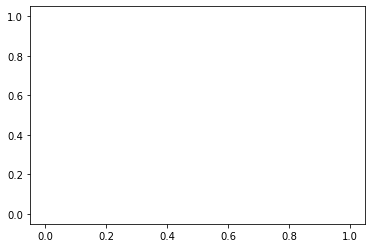

In [339]:
plt.plot(train_pnl)

In [202]:

import statsmodels.formula.api as smf
def step_aic(model, exog, endog, **kwargs):
    """
    This select the best exogenous variables with AIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)

    Note: This adopt only "forward" selection

    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)

    Returns:
        model: a model that seems to have the smallest AIC
    """
    for key in kwargs.keys():
        df = kwargs[key]
    df_name = "df"    
    remaining = set(exog)
    
    exog = [df_name+"['"+s+"']" for s in exog]
    endog = [df_name+"['"+s+"']" for s in endog]
    
        
    # exog, endogは強制的にリスト形式に変換しておく
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    selected = []  # 採用が確定された要因
    chosen_signals = []
    # 定数項のみのAICを計算
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    #aic = model(formula=formula, **kwargs).fit().aic
    aic = model(formula=formula, data=df).fit().aic
    print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

    current_score, best_new_score = np.ones(2) * aic

    # 全要因を採択するか，どの要因を追加してもAICが上がらなければ終了
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:

            # 残っている要因を1つずつ追加したときのAICを計算
            formula_tail = ' + '.join(selected + [df_name+"['"+candidate+"']"])
            formula = formula_head + formula_tail
            #aic = model(formula=formula, **kwargs).fit().aic
            aic = model(formula=formula, data=df).fit().aic
            print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

            scores_with_candidates.append((aic, candidate))

        # 最もAICが小さかった要因をbest_candidateとする
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()

        # 候補要因追加でAICが下がったならば，それを確定要因として追加する
        
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(df_name+"['"+best_candidate+"']")
            chosen_signals.append(best_candidate)
            current_score = best_new_score

    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    #return model(formula, **kwargs).fit()
    result = OrderedDict([("model", model), ("chosen.signals", chosen_signals)])
    #return model(formula, data=df).fit()
    return result

In [203]:
fwd_model = step_aic(smf.ols, train_mat.columns[:-4], ["ret."+str(period)], data=train_mat)
## The best formula: The best formula: df['ret.4096'] ~ df['trade.imb.std.4096'] + df['trade.imb.4096']

AIC: 15678.566, formula: df['ret.4096'] ~ 1
AIC: 15680.059, formula: df['ret.4096'] ~ df['kdj.k.range.4096']
AIC: 15680.45, formula: df['ret.4096'] ~ df['dbook.4096']
AIC: 15680.054, formula: df['ret.4096'] ~ df['kdj.k.4096']
AIC: 15680.502, formula: df['ret.4096'] ~ df['total.trade.imb.4096']
AIC: 15680.423, formula: df['ret.4096'] ~ df['nr.trend.index.4096']
AIC: 15680.545, formula: df['ret.4096'] ~ df['range.pos.volume.open.ratio.4096']
AIC: 15680.539, formula: df['ret.4096'] ~ df['nr.4096']
AIC: 15680.292, formula: df['ret.4096'] ~ df['nr.volume.open.ratio.4096']
AIC: 15680.342, formula: df['ret.4096'] ~ df['kdj.k.volume.open.ratio.4096']
AIC: 15680.387, formula: df['ret.4096'] ~ df['total.trade.imb.volume.open.ratio.4096']
AIC: 15680.307, formula: df['ret.4096'] ~ df['ma.dif.10.4096']
AIC: 15680.41, formula: df['ret.4096'] ~ df['dbook.volume.open.ratio.4096']
AIC: 15680.255, formula: df['ret.4096'] ~ df['trade.imb.trend.index.4096']
AIC: 15678.685, formula: df['ret.4096'] ~ df['nr

In [204]:
y_signal = "ret."+str(period)
formula = "train_mat['" + y_signal+"'] ~ "
for signal in fwd_model["chosen.signals"]:
    formula = formula+"+train_mat['"+signal+"']"
formula+="+0"
formula
## "train_mat['ret.4096'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.4096']+0"96']+0"



"train_mat['ret.4096'] ~ +train_mat['trade.imb.std.4096']+train_mat['trade.imb.4096']+0"

In [206]:
formula
fit_lm  = smf.ols(formula=formula, data=train_mat[train_mat.columns]).fit()
print(fit_lm.summary())

#    OLS Regression Results                                  
# ==========================================================================================
# Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.002
# Model:                               OLS   Adj. R-squared (uncentered):              0.002
# Method:                    Least Squares   F-statistic:                              5.322
# Date:                   Thu, 16 Jul 2020   Prob (F-statistic):                     0.00491
# Time:                           19:40:56   Log-Likelihood:                         -7834.4
# No. Observations:                   5524   AIC:                                  1.567e+04
# Df Residuals:                       5522   BIC:                                  1.569e+04
# Df Model:                              2                                                  
# Covariance Type:               nonrobust                                                  
# ===================================================================================================
#                                       coef    std err          t      P>|t|      [0.025      0.975]
# ---------------------------------------------------------------------------------------------------
# train_mat['trade.imb.std.4096']    -0.0530      0.017     -3.063      0.002      -0.087      -0.019
# train_mat['trade.imb.4096']         0.0203      0.012      1.681      0.093      -0.003       0.044
# ==============================================================================
# Omnibus:                     2008.537   Durbin-Watson:                   2.045
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49040.806
# Skew:                          -1.180   Prob(JB):                         0.00
# Kurtosis:                      17.405   Cond. No.                         3.07
# ==============================================================================

# Warnings:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

                                  OLS Regression Results                                  
Dep. Variable:     train_mat['ret.4096']   R-squared (uncentered):                   0.002
Model:                               OLS   Adj. R-squared (uncentered):              0.002
Method:                    Least Squares   F-statistic:                              5.322
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):                     0.00491
Time:                           19:40:56   Log-Likelihood:                         -7834.4
No. Observations:                   5524   AIC:                                  1.567e+04
Df Residuals:                       5522   BIC:                                  1.569e+04
Df Model:                              2                                                  
Covariance Type:               nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025   

In [207]:
strat = "full."+str(period)
for product in product_list:
    os.makedirs(HEAD_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
fit_coef = fit_lm.params.values
fit_coef

## array([-0.05295827,  0.02028363])

array([-0.05295827,  0.02028363])

In [208]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = fit_coef*train_std_mat[product][y_signal]/train_std_mat[product][fwd_model["chosen.signals"]]
    print(coef)
    parLapply(CORE_NUM, all_dates, get_daily_pred, 
              product=product, signal_list=fwd_model["chosen.signals"], 
              coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;

# IF
# trade.imb.std.4096   -0.001523
# trade.imb.4096        0.006299
# dtype: float64
# IH
# trade.imb.std.4096   -0.003341
# trade.imb.4096        0.007236
# dtype: float64
# IC
# trade.imb.std.4096   -0.000812
# trade.imb.4096        0.010247
# dtype: float64
# Wall time: 1min 36s


IF
trade.imb.std.4096   -0.001523
trade.imb.4096        0.006299
dtype: float64
IH
trade.imb.std.4096   -0.003341
trade.imb.4096        0.007236
dtype: float64
IC
trade.imb.std.4096   -0.000812
trade.imb.4096        0.010247
dtype: float64
Wall time: 1min 36s


''

- the result is worse than original ret.4096
- we can use machine learning models next week


In [210]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("full.4096", all_dates, product, 4096)

# Wall time: 1min 5s

    

Wall time: 27.2 s


In [211]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("full", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 12min 12s



reverse=1
reverse=1
reverse=1
Wall time: 5min 2s


In [212]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"full.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>2*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    
# IF train sharpe  0.06883626194042759 test sharpe  -0.6713226838487464
# IH train sharpe  0.2392879506710839 test sharpe  -0.44305823063348854
# IC train sharpe  nan test sharpe  nan



IF train sharpe  0.06883626194042759 test sharpe  -0.6713226838487464
IH train sharpe  0.2392879506710839 test sharpe  -0.44305823063348854
IC train sharpe  nan test sharpe  nan


- The result is not good
- Now we use another method of training
- we train each product with separate models


In [213]:
coef_list = dict([])
each_signal = dict([])
for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    result = forward_selected(train_mat[train_mat.columns[:-3]], "ret."+str(period))
    y_signal = "ret."+str(period)
    formula = "train_mat['" + y_signal+"'] ~ "
    for signal in result["chosen.signals"]:
        formula = formula+"+train_mat['"+signal+"']"
    formula+="+0"
    fit_lm = smf.ols(formula=formula, data=train_mat[train_mat.columns[:-3]]).fit()
    coef = fit_lm.params.values
    coef_list[product] = coef
    each_signal[product] = result["chosen.signals"]
    

In [214]:
save([coef_list, each_signal], HEAD_PATH+"/index.each_coef.pkl")

In [215]:
coef_list, each_signal = load(HEAD_PATH+"/index.each_coef.pkl")

In [216]:
%%time
strat = "each.4096"

for product in product_list[0:3]:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)
    print(product)
    coef = coef_list[product]
    print(coef)
    parLapply(CORE_NUM, all_dates, get_daily_pred, product=product, signal_list=each_signal[product], 
              coef=coef, strat=strat, HEAD_PATH=SAVE_PATH)
;

# IF
# [ 8.53302721e-03 -1.66792792e-03 -6.82704619e-03 -9.36785516e-01
#  -5.96318477e-02  1.98072479e-02  5.15393102e-04 -2.98073188e-03
#  -2.15657829e-02 -2.02466744e-02  2.42368457e-01]
# IH
# [-6.42891547e-03  7.24596777e-04 -7.03034124e-05  1.70404434e+00
#  -1.60170789e-04  1.98101246e-03 -1.50139676e-02 -1.25044673e-03
#   9.44496131e-03]
# IC
# [-3.31190939e-02  1.47577526e-01  5.71499405e-03 -1.84064073e-03
#  -1.27783240e-04  2.95454118e-04  2.16835153e-02  1.07408866e+00
#  -1.96074479e+00 -3.53046450e-04  5.62628747e-04 -5.50655375e-01
#  -1.32143940e-02  1.38414043e-02  1.96327195e-01 -1.44507778e-01]
# Wall time: 9min 37s


IF
[ 8.53302721e-03 -1.66792792e-03 -6.82704619e-03 -9.36785516e-01
 -5.96318477e-02  1.98072479e-02  5.15393102e-04 -2.98073188e-03
 -2.15657829e-02 -2.02466744e-02  2.42368457e-01]
IH
[-6.42891547e-03  7.24596777e-04 -7.03034124e-05  1.70404434e+00
 -1.60170789e-04  1.98101246e-03 -1.50139676e-02 -1.25044673e-03
  9.44496131e-03]
IC
[-3.31190939e-02  1.47577526e-01  5.71499405e-03 -1.84064073e-03
 -1.27783240e-04  2.95454118e-04  2.16835153e-02  1.07408866e+00
 -1.96074479e+00 -3.53046450e-04  5.62628747e-04 -5.50655375e-01
 -1.32143940e-02  1.38414043e-02  1.96327195e-01 -1.44507778e-01]
Wall time: 9min 37s


''

In [220]:
%%time
for product in product_list[0:3]:
    par_get_all_signal("each.4096", all_dates, product, 4096)
# Wall time: 26.8 s

Wall time: 26.8 s


In [221]:
%%time
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"] 
    evaluate_signal("each", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH,period=4096, split_str="2018", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# reverse=1
# Wall time: 6min 36s



reverse=1
reverse=1
reverse=1
Wall time: 6min 36s


In [345]:
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+"each.4096"+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>6*spread)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))

    
# IF train sharpe  1.0153759557653659 test sharpe  0.29087739699914444
# IH train sharpe  0.21876773904066704 test sharpe  1.3872334143409275
# IC train sharpe  1.0227104354804133 test sharpe  -0.037669959530865646




IF train sharpe  1.0153759557653659 test sharpe  0.29087739699914444
IH train sharpe  0.23485962451655262 test sharpe  1.3900762853781556
IC train sharpe  1.0240050870714414 test sharpe  -0.04410124249869273


Conclusion

- we can use a linear model for T,TF
